# Walmart Store Sales Forecasting

In [1]:
import pandas as pd
import numpy as np

In [45]:
import seaborn as sns 

In [2]:
train = pd.read_csv('../Walmart/train.csv')
test = pd.read_csv('../Walmart/test.csv')
features = pd.read_csv('../Walmart/features.csv')
stores = pd.read_csv('../Walmart/stores.csv')

In [3]:
len(stores)

45

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
len(features)

8190

In [6]:
merged =  features.merge(stores, how='inner', on='Store')

In [7]:
merged.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [8]:
new_df = train.merge(merged, how='inner', on=['Store', 'IsHoliday', 'Date'])

In [10]:
new_df_test =  test.merge(merged, how='inner', on=['Store', 'IsHoliday', 'Date'])

In [11]:
new_df.isnull().sum() / len(new_df)

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
Type            0.000000
Size            0.000000
dtype: float64

In [12]:
new_df.duplicated().sum()

0

# Initial Cleaning

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [14]:
new_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [15]:
# Convert datetime 
new_df['Date'] = pd.to_datetime(new_df['Date'], format='%Y-%m-%d')

In [42]:
#make 3 more date columns
new_df['Day']= new_df['Date'].dt.day
new_df['Month'] =  new_df['Date'].dt.month
new_df['Year'] =  new_df['Date'].dt.year
new_df['Week'] =  new_df['Date'].dt.isocalendar().week


In [43]:
#make 3 more date columns forr test data
new_df_test['Week'] =  new_df_test['Date'].dt.isocalendar().week
new_df_test['Day']= new_df_test['Date'].dt.day
new_df_test['Month'] =  new_df_test['Date'].dt.month
new_df_test['Year'] =  new_df_test['Date'].dt.year


In [82]:
new_df['day??'] =  new_df['Date'].dt.day_name()

In [84]:
new_df['day??'].value_counts() # all on friday???

Friday    421570
Name: day??, dtype: int64

# EDA

### Does day week month affect sales

In [38]:
#weekly sales
weekly =  new_df.groupby(by='week').sum()

<AxesSubplot:xlabel='Dayofweek', ylabel='Weekly_Sales'>

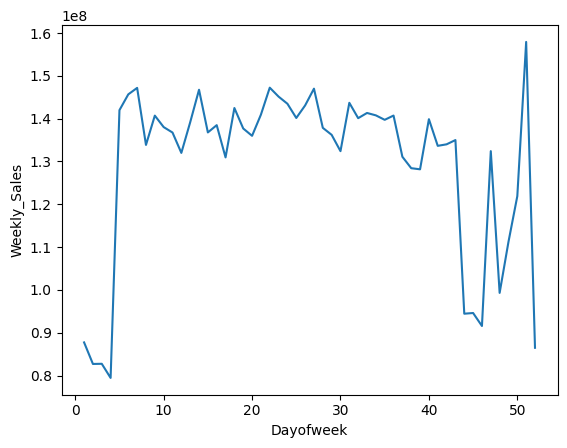

In [47]:
sns.lineplot(data=weekly, x=weekly.index, y='Weekly_Sales')

In [48]:
#sales by day of the month
daily = new_df.groupby(by='Day').sum()

In [54]:
daily.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Year,Dayofweek,Week
Day,,,,,,,,,,,,,,,,,,
1,261635,518677,1.815590e+08,0,787902.32,40463.891,2.149713e+07,58499.80,320022.10,4.838199e+06,9097958.72,2.013065e+06,94058.642,1605528492,79329,23649368,293780,293780
2,328304,656239,2.409695e+08,0,880964.17,48472.152,6.347565e+07,5025462.02,10832477.45,4.237132e+07,66509774.93,2.528377e+06,118681.257,2025070058,103654,29757913,388016,388016
3,327268,653741,2.394468e+08,0,926546.39,48641.044,1.745508e+08,9284883.45,543984.81,1.250887e+08,28950270.39,2.524445e+06,116793.578,2015746197,108944,29644220,415108,415108
4,326069,650699,2.391020e+08,0,762313.89,49348.933,3.465996e+07,107488.00,265326.12,1.134171e+07,9475345.87,2.511554e+06,117875.192,2013148564,79455,29567778,288438,288438
5,326470,651193,2.379863e+08,0,807444.92,46877.374,1.500597e+07,0.00,59376.73,8.349388e+06,10769961.00,2.506627e+06,119534.248,2017996303,100164,29624221,380030,380030


<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

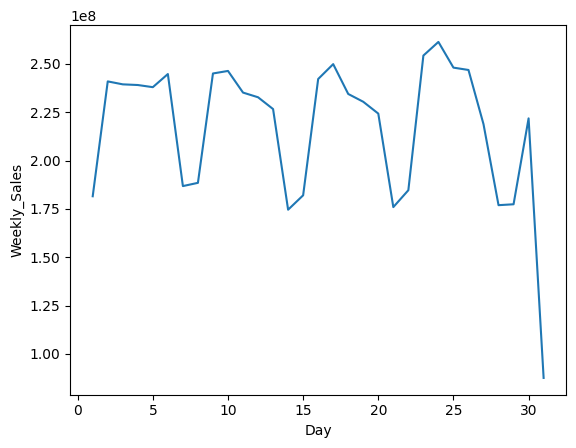

In [49]:
sns.lineplot(data=daily, x=daily.index, y='Weekly_Sales')

<AxesSubplot:>

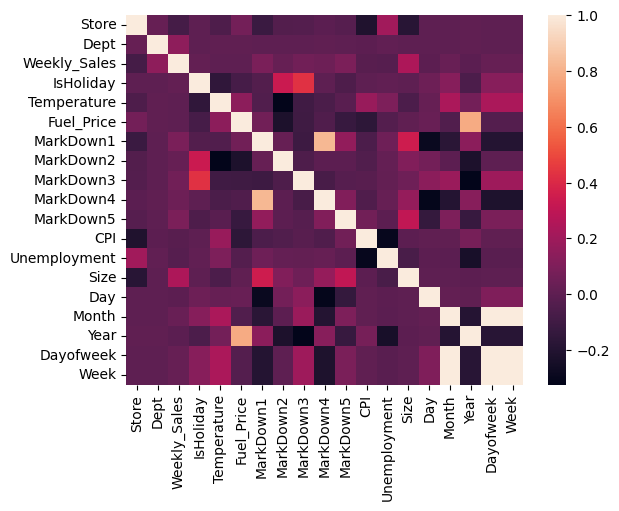

In [64]:
sns.heatmap( new_df.corr())

#### Weekly sales per year

In [66]:
weekly_sales2010 = new_df.loc[new_df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010.head()

Weekly_Sales          
              mean    median
Week                        
5     16836.121997  7904.690
6     16352.056032  8365.095
7     16216.658979  8411.250
8     14899.549688  7235.800
9     15921.015727  7717.975

In [87]:
weekly_sales2011 = new_df[new_df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

Weekly_Sales           
              mean     median
Week                         
1     14599.244973   6384.990
2     13891.283484   5961.710
3     13932.367385   6139.315
4     13566.239462   6227.980
5     15773.448776   7312.115
6     16111.706191   7871.475
7     16541.991212   8480.370
8     15049.747558   7239.480
9     15882.557045   7633.160
10    15056.450540   7104.210
11    15216.115961   7578.270
12    14573.827050   7208.515
13    14726.869261   7048.010
14    15634.571312   7390.140
15    15229.708141   7424.550
16    16472.653827   8167.830
17    14745.946064   7437.785
18    15757.215296   7608.145
19    15317.204186   7446.600
20    15002.247279   7318.740
21    15390.233449   7591.590
22    16691.305332   8002.510
23    16302.918830   7908.375
24    16111.226407   7741.320
25    15649.418342   7536.110
26    16232.862334   7754.000
27    16328.646803   7588.980
28    15566.323502   7249.960
29    15526.204180   7376.995
30    14965.150490   7208.870
31    16393.126313   7901.070
32    15774.068626   7526.450
33    15888.028317   7597.580
34    16068.095036   7607.510
35    15387.122167   7330.000
36    15809.069483   7491.435
37    14865.566897   6995.875
38    14446.431089   7008.990
39    14298.824402   6781.340
40    15960.678959   7476.680
41    15062.736015   7102.200
42    15521.325691   7388.685
43    15470.924781   7407.650
44    16471.071192   7657.955
45    16348.811046   7540.390
46    15683.546288   7404.920
47    22043.563476   9632.310
48    16496.511854   7656.425
49    18458.853056   8732.805
50    19942.149333   9836.400
51    25437.146122  12685.690
52    15332.154858   7562.110

In [89]:
weekly_sales2012 = new_df[new_df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

In [69]:
import plotly.graph_objects as go


In [91]:
fig = go.Figure()
fig.add_trace(go.Scatter( x = weekly_sales2010['Weekly_Sales']['mean'].index, 
                         y = weekly_sales2010['Weekly_Sales']['mean'], 
                         name = 'Mean Sales 2010',
                         mode = 'lines') )
fig.add_trace(go.Scatter( x = weekly_sales2011['Weekly_Sales']['mean'].index, y = weekly_sales2011['Weekly_Sales']['mean'], name = 'Mean Sales 2011', mode = 'lines') )


fig.add_trace(go.Scatter( x = weekly_sales2012['Weekly_Sales']['mean'].index, y = weekly_sales2012['Weekly_Sales']['mean'], name = 'Mean Sales 2012', mode = 'lines') )




### Temperature Effect

In [93]:
new_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Day,Month,Year,Dayofweek,Week,dayoftheweek,day?,day??
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,5,4,4,Friday
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,5,4,4,Friday
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,5,4,4,Friday
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,5,4,4,Friday
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,5,2,2010,5,5,4,4,Friday
